In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

# load the dataset
df = pd.read_csv('/content/drive/MyDrive/Angraj project dmkd/01. bank-additional-full.csv', sep=";")

#Check number of rows and columns in the dataset
print("The dataset has %d rows and %d columns." % df.shape)

FileNotFoundError: ignored

In [ ]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


data preprocessing

In [ ]:
pre_df = df.copy()
pre_df.drop(['contact','month','day_of_week','default','pdays',],axis=1,inplace=True)
pre_df.head(5)

,age,job,marital,education,housing,loan,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

def preprocess_data(pre_df):
    pre_df1=pre_df.copy()
    categ=['housing','loan','poutcome','job','marital','education']
    le = LabelEncoder()
    pre_df1[categ] = pre_df1[categ].apply(le.fit_transform)
  
    
    return pre_df1

In [ ]:
pre_df1 = preprocess_data(pre_df)
pre_df1.head(3)

,age,job,marital,education,housing,loan,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,261,1,0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,57,7,1,3,0,0,149,1,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,37,7,1,3,2,0,226,1,0,1,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:

pre_df1["y"] = pre_df1["y"].apply(lambda x: 0 if x=="no" else 1)

UNIVARIATE METHODS: MEASURES OF CENTER AND SPREAD

Measures of center and spread

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [ ]:
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode

configure_plotly_browser_state()

init_notebook_mode(connected=False)# to show plots in notebook

from plotly.offline import plot, iplot

# do not show any warnings
import warnings
warnings.filterwarnings('ignore')


colors = plotly.colors.DEFAULT_PLOTLY_COLORS


def create_box_trace(col, visible=False):
    return go.Box(
        y=pre_df1[col],
        name=col,
        marker = dict(color = colors[0]),
        visible=visible,
    )

features_not_for_hist = ["age","job",	"marital","education"]
features_for_hist = [x for x in pre_df1.columns if x not in features_not_for_hist]
# remove features with too less distinct values (e.g. binary features), because boxplot does not make any sense for them
features_for_box = [col for col in features_for_hist if len(pre_df1[col].unique())>5]

active_idx = 0
box_traces = [(create_box_trace(col) if i != active_idx else create_box_trace(col, visible=True)) for i, col in enumerate(features_for_box)]

data = box_traces

n_features = len(features_for_box)
steps = []
for i in range(n_features):
    step = dict(
        method = 'restyle',  
        args = ['visible', [False] * len(data)],
        label = features_for_box[i],
    )
    step['args'][1][i] = True # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active = active_idx,
    currentvalue = dict(
        prefix = "Feature: ", 
        xanchor= 'center',
    ),
    pad = {"t": 50},
    steps = steps,
    len=1,
)]

layout = dict(
    sliders=sliders,
    yaxis=dict(
        title='value',
        automargin=True,
    ),
    legend=dict(
        x=0,
        y=1,
    ),
)

fig = dict(data=data, layout=layout)

iplot(fig, filename='box_slider')

Output hidden; open in https://colab.research.google.com to view.

Estimation

Confidence Interval Estimate

In [ ]:
import numpy as np
import scipy.stats as st

st.t.interval(alpha=0.95, df=len(df['cons.price.idx'])-1, loc=np.mean(df['cons.price.idx']), scale=st.sem(df['cons.price.idx']))

(93.57007408171604, 93.58125465490922)

we are 95% confident that the population mean number of cons.price.idx for all data falls between 93.93.57007408171604 and 93.58125465490922

In [ ]:
jo = df[df["job"]=="services"]

In [ ]:
jo['cons.price.idx'].describe()

count    3969.000000
mean       93.634659
std         0.559536
min        92.201000
25%        93.075000
50%        93.918000
75%        93.994000
max        94.767000
Name: cons.price.idx, dtype: float64

In [ ]:
st.t.interval(alpha=0.95, df=len(jo['cons.price.idx'])-1, loc=np.mean(jo['cons.price.idx']), scale=st.sem(jo['cons.price.idx']))

(93.61724581388481, 93.65207139447713)

We are  95%  confident that the mean number of cons.idx.price for all services job falls between 93.61724581388481 and 93.65207139447713

In [ ]:
ag = df[df["age"]==57]

In [ ]:
ag['cons.price.idx'].describe()

count    646.000000
mean      93.639068
std        0.525088
min       92.201000
25%       93.200000
50%       93.918000
75%       93.994000
max       94.767000
Name: cons.price.idx, dtype: float64

In [ ]:
st.t.interval(alpha=0.95, df=len(ag['cons.price.idx'])-1, loc=np.mean(ag['cons.price.idx']), scale=st.sem(ag['cons.price.idx']))

(93.59850045134988, 93.6796357715605)

we are 95 % sure that the mean number of 57 age falls between 93.59850045134988 and 93.6796357715605

BIVARIATE METHODS

In [ ]:
pre_df1.tail(10)

,age,job,marital,education,housing,loan,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41178,62,retired,married,university.degree,0,0,483,2,3,2,-1.1,94.767,-50.8,1.031,4963.6,1
41179,64,retired,divorced,professional.course,2,0,151,3,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41180,36,admin.,married,university.degree,0,0,254,2,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41181,37,admin.,married,university.degree,2,0,281,1,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41182,29,unemployed,single,basic.4y,2,0,112,1,1,2,-1.1,94.767,-50.8,1.028,4963.6,0
41183,73,retired,married,professional.course,2,0,334,1,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,0,0,383,1,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,2,0,189,2,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,0,0,442,1,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41187,74,retired,married,professional.course,2,0,239,3,1,0,-1.1,94.767,-50.8,1.028,4963.6,0


Regression

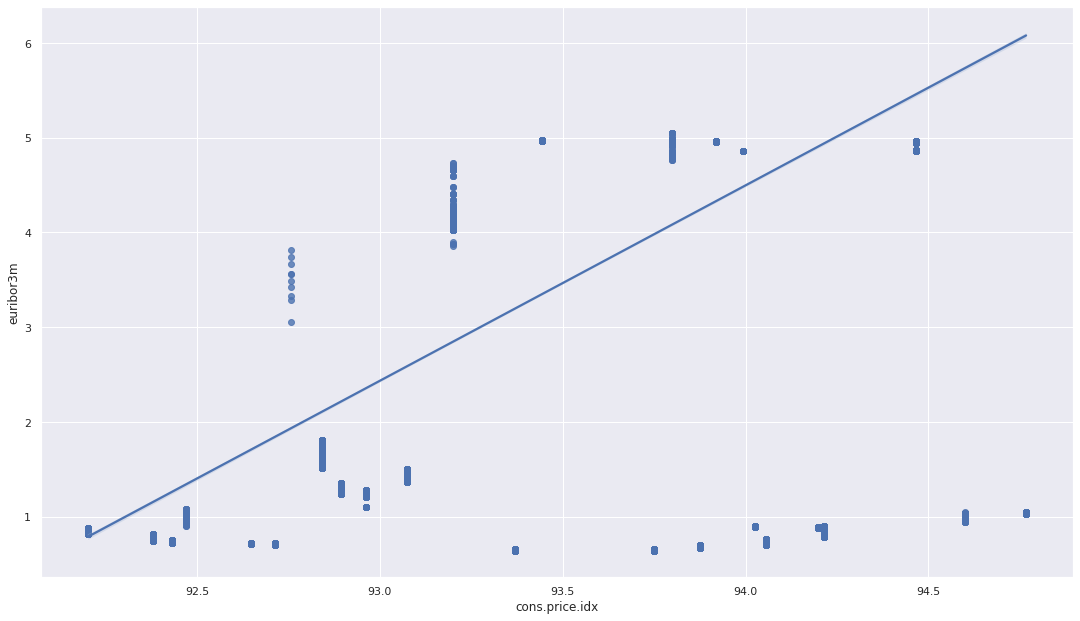

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(color_codes=True)
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
sns.regplot(x="cons.price.idx", y="euribor3m", data=pre_df1, ax=ax)

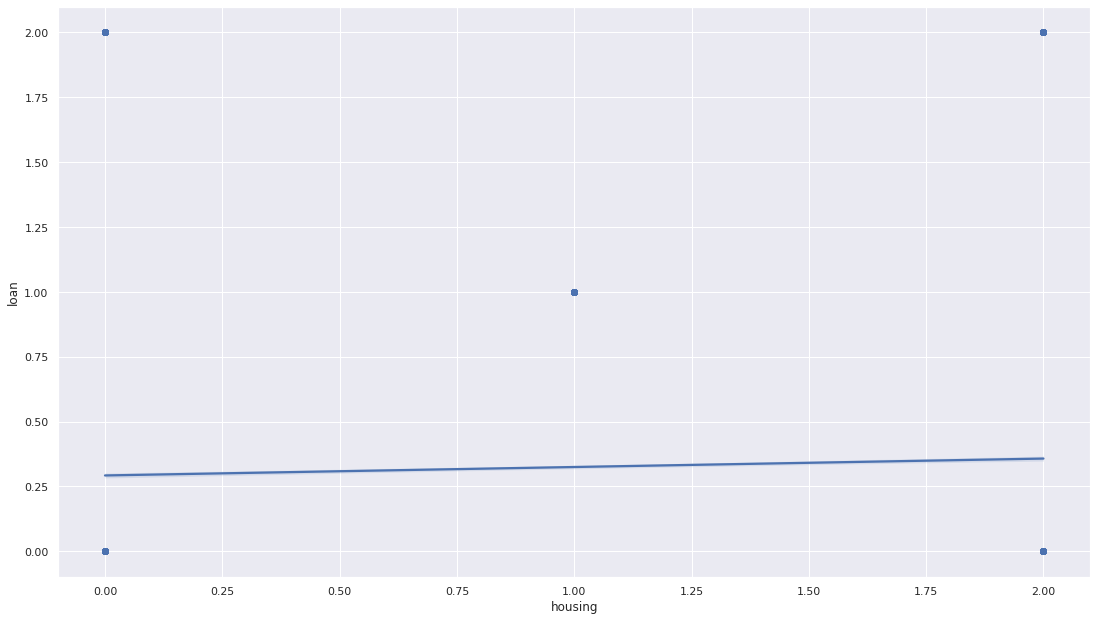

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(color_codes=True)
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
sns.regplot(x="housing", y="loan", data=pre_df1, ax=ax)

Regression - Calculation

In [ ]:
# implementing the regression equation
def regression_equation(x, y):
    x_mean = x.mean()
    y_mean = y.mean()
    x_squared = (x**2).sum()
    xy = (x*y).sum()
    std_dev = x.std()
    var_x = std_dev ** 2
    cov_xy = (xy - len(x)*x_mean*y_mean)/(len(x)-1)
    b_1 = cov_xy/var_x
    b_0 = y_mean - b_1*x_mean
    print('Regression equation is: %.3f %.3f (x)' % (b_0, b_1))
    y_hat = b_0+b_1*x
    return y_hat

In [ ]:
pred = regression_equation(pre_df1['cons.price.idx'], pre_df1['y'])
print(pred)

Regression equation is: 7.075 -0.074 (x)
0        0.081530
1        0.081530
2        0.081530
3        0.081530
4        0.081530
           ...   
41183    0.024017
41184    0.024017
41185    0.024017
41186    0.024017
41187    0.024017
Name: cons.price.idx, Length: 41188, dtype: float64


In [ ]:
pred = regression_equation(pre_df1['loan'], pre_df1['y'])
print(pred)


Regression equation is: 0.113 -0.002 (x)
0        0.113356
1        0.113356
2        0.113356
3        0.113356
4        0.109067
           ...   
41183    0.113356
41184    0.113356
41185    0.113356
41186    0.113356
41187    0.113356
Name: loan, Length: 41188, dtype: float64


In [ ]:
pred = regression_equation(pre_df1['euribor3m'], pre_df1['y'])
print(pred)

Regression equation is: 0.316 -0.056 (x)
0        0.043326
1        0.043326
2        0.043326
3        0.043326
4        0.043326
           ...   
41183    0.258148
41184    0.258148
41185    0.258148
41186    0.258148
41187    0.258148
Name: euribor3m, Length: 41188, dtype: float64


Residuals

In [ ]:
pred_rating = pd.DataFrame()

pred_rating['education'] = pre_df1['education']
pred_rating['Actual output']  = pre_df1['y']
pred_rating['Predicted output'] =  pred
pred_rating['Predicted Error'] = pre_df1['y'] - pred

In [ ]:
pred_rating.head(20)

,education,Actual output,Predicted output,Predicted Error
0,basic.4y,0,0.113356,-0.113356
1,high.school,0,0.113356,-0.113356
2,high.school,0,0.113356,-0.113356
3,basic.6y,0,0.113356,-0.113356
4,high.school,0,0.109067,-0.109067
5,basic.9y,0,0.113356,-0.113356
6,professional.course,0,0.113356,-0.113356
7,unknown,0,0.113356,-0.113356
8,professional.course,0,0.113356,-0.113356
9,high.school,0,0.113356,-0.113356


In [ ]:
pred_rating = pd.DataFrame()

pred_rating['pout'] = pre_df1['poutcome']
pred_rating['Actual output']  = pre_df1['y']
pred_rating['Predicted output'] =  pred
pred_rating['Predicted Error'] = pre_df1['y'] - pred

In [ ]:
pred_rating.head(20)

,pout,Actual output,Predicted output,Predicted Error
0,1,0,0.113356,-0.113356
1,1,0,0.113356,-0.113356
2,1,0,0.113356,-0.113356
3,1,0,0.113356,-0.113356
4,1,0,0.109067,-0.109067
5,1,0,0.113356,-0.113356
6,1,0,0.113356,-0.113356
7,1,0,0.113356,-0.113356
8,1,0,0.113356,-0.113356
9,1,0,0.113356,-0.113356


New Prediction

In [ ]:
#plot libaries
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode

configure_plotly_browser_state()

init_notebook_mode(connected=False)# to show plots in notebook


layout = dict(
    yaxis=dict(
        title='Y',
        automargin=True,
    ),
    xaxis=dict(
        title='Feature: cons.price.idx',
        automargin=True,
    ),
)
fig = go.Figure(layout=layout)

# Add traces
fig.add_trace(go.Scatter(x=pre_df1['cons.price.idx'], y=pre_df1['y'],
                    mode='markers',
                    name='Ratings'))
fig.add_trace(go.Scatter(x=pre_df1['cons.price.idx'], y=(59.961-2.462*pre_df1['cons.price.idx']),
                    mode='lines',
                    name='Regression'))


fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#plot libaries
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode

configure_plotly_browser_state()

init_notebook_mode(connected=False)# to show plots in notebook


layout = dict(
    yaxis=dict(
        title='Y',
        automargin=True,
    ),
    xaxis=dict(
        title='Feature: poutcome',
        automargin=True,
    ),
)
fig = go.Figure(layout=layout)

# Add traces
fig.add_trace(go.Scatter(x=pre_df1['poutcome'], y=pre_df1['y'],
                    mode='markers',
                    name='Ratings'))
fig.add_trace(go.Scatter(x=pre_df1['poutcome'], y=(59.961-2.462*pre_df1['poutcome']),
                    mode='lines',
                    name='Regression'))


fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#plot libaries
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode

configure_plotly_browser_state()

init_notebook_mode(connected=False)# to show plots in notebook


layout = dict(
    yaxis=dict(
        title='Y',
        automargin=True,
    ),
    xaxis=dict(
        title='Feature: poutcome',
        automargin=True,
    ),
)
fig = go.Figure(layout=layout)

# Add traces
fig.add_trace(go.Scatter(x=pre_df1['poutcome'], y=pre_df1['y'],
                    mode='markers',
                    name='Ratings'))
fig.add_trace(go.Scatter(x=pre_df1['poutcome'], y=(59.961-2.462*pre_df1['poutcome']),
                    mode='lines',
                    name='Regression'))

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

def preprocess_data(pre_df):
    pre_df1=pre_df.copy()
    categ=["job","education"]
    le = LabelEncoder()
    pre_df1[categ] = pre_df1[categ].apply(le.fit_transform)
  
    
    return pre_df1

In [ ]:
pre_df1 = preprocess_data(pre_df)
pre_df1.head(3)

,age,job,marital,education,housing,loan,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,married,0,no,no,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,7,married,3,no,no,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,7,married,3,yes,no,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
#plot libaries
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode

configure_plotly_browser_state()

init_notebook_mode(connected=False)# to show plots in notebook


layout = dict(
    yaxis=dict(
        title='Y',
        automargin=True,
    ),
    xaxis=dict(
        title='Feature: job',
        automargin=True,
    ),
)
fig = go.Figure(layout=layout)

# Add traces
fig.add_trace(go.Scatter(x=pre_df1['job'], y=pre_df1['y'],
                    mode='markers',
                    name='Ratings'))
fig.add_trace(go.Scatter(x=pre_df1['job'], y=(59.961-2.462*pre_df1['job']),
                    mode='lines',
                    name='Regression'))

Output hidden; open in https://colab.research.google.com to view.

MULTIPLE REGRESSION

In [ ]:
pre_df1.head(3)

,age,job,marital,education,housing,loan,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,261,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,0,0,149,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,2,0,226,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [ ]:
#plot libaries
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode

configure_plotly_browser_state()

init_notebook_mode(connected=False)# to show plots in notebook

from plotly.offline import plot, iplot

# do not show any warnings
import warnings
warnings.filterwarnings('ignore')

SEED = 17 # specify seed for reproducable results
pd.set_option('display.max_columns', None) # prevents abbreviation (with '...') of columns in prints

colors = plotly.colors.DEFAULT_PLOTLY_COLORS

def create_scatter_trace(x, y, visible=False):
    return go.Scatter(x=pre_df1[x], y=pre_df1[y],
                    mode='markers',
                    name=y.title(),
                    marker = dict(
                        size=8,
                    ),
                    visible=visible)

def create_line_trace(x,y, visible=False):
    return go.Scatter(x=pre_df1[x], y=regression_equation(pre_df1[x],pre_df1[y]),
                    mode='lines',
                    name='Regression',
                    visible=visible)

features_not_for_reg = [ "age", "y"]
features_for_reg = [x for x in pre_df1.columns if x not in features_not_for_reg]
active_idx = 0

traces_scatter = [(create_scatter_trace(col,'y') if i != active_idx else create_scatter_trace(col,'y', visible=True)) for i, col in enumerate(features_for_reg)]
traces_line = [(create_line_trace(col,'y') if i != active_idx else create_line_trace(col,'y', visible=True)) for i, col in enumerate(features_for_reg)]

data = traces_scatter + traces_line

n_features = len(features_for_reg)

steps = []
for i in range(n_features):
    step = dict(
        method = 'restyle',  
        args = ['visible', [False] * len(data)],
        label = features_for_reg[i],
    )
    step['args'][1][i] = True # Toggle i'th trace to "visible"
    step['args'][1][i + n_features] = True # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active = active_idx,
    currentvalue = dict(
        prefix = "Feature: ", 
        xanchor= 'center',
    ),
    pad = {"t": 50},
    steps = steps,
)]

layout = dict(
    sliders=sliders,
    yaxis=dict(
        title='y',
        automargin=True,
    ),
)

fig = dict(data=data, layout=layout)

iplot(fig, filename='regression_slider')

Output hidden; open in https://colab.research.google.com to view.

Correlation Coefficients

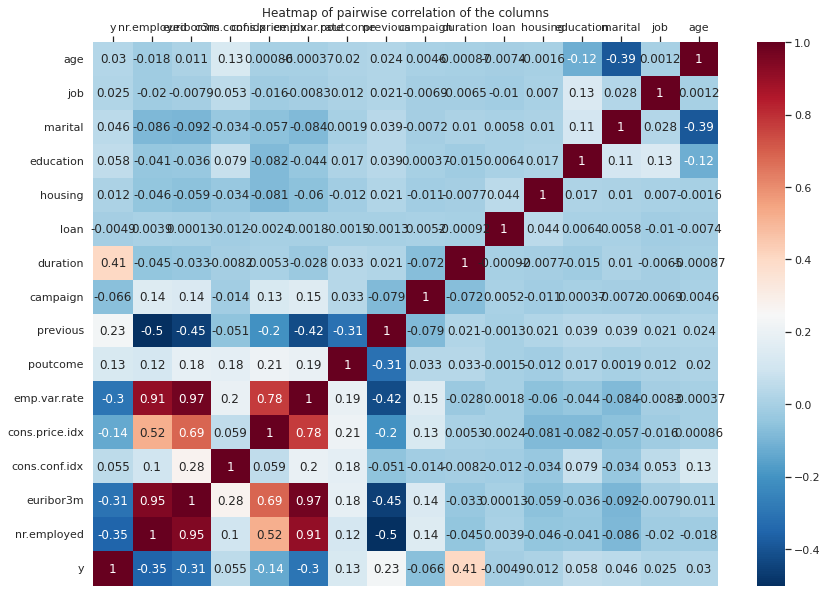

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(14, 10))

corr = pre_df1.corr()

ax = sns.heatmap(corr, cmap = "RdBu_r", annot=True)

ax.invert_xaxis()

ax.xaxis.set_ticks_position('top')

plt.title("Heatmap of pairwise correlation of the columns")

plt.show()